# Ejercicio. Considere el siguiente tablero 


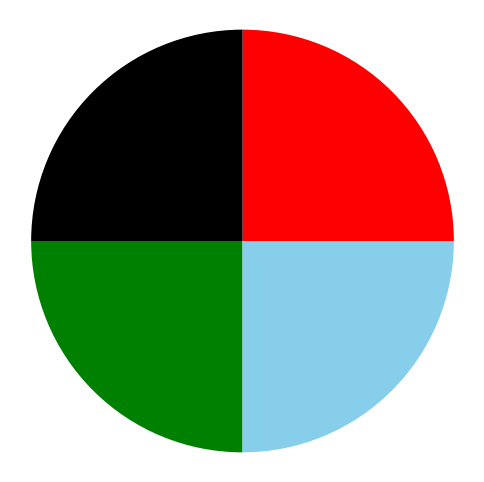

In [112]:
import matplotlib.pyplot as plt

# Datos para el gráfico de pastel
sizes = [25, 25, 25, 25]  # Porcentajes de cada sección
colors = ['red', 'black', 'green', '#87CEEB']  # Colores de cada sección (rosa claro, plata, verde claro, azul claro)
labels = ['Cuadrante 1', 'Cuadrante 2', 'Cuadrante 3', 'Cuadrante 4']  # Etiquetas para cada sección

# Crea el gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(sizes, colors=colors)

# Ajusta el aspecto para que sea un círculo
plt.axis('equal')

# Muestra el gráfico
plt.show()



Lanzamos dos monedas y avanzamos en sentido horario, el número de caras que aparezcan. Si repetimos el procedimiento 
## ¿Son todos los sectores igual de probables cuando pase mucho tiempo?

## Analíticamente 

Consideremos la cadena de Markov con espacio de estados $S = \{N,R,A,V\}$, en donde: **N:= Negro**, **R:= Rojo**, **A:= Azul** y **V:= Verde**.

Además, consideremos que menciona que avanzaremos en sentido horario la cantidad de caras que caigan, es decir, puede ocurrir los siguientes casos:
$\{XX,XC,CX,CC\}$, entonces, las prbabilidades quedarian como:

$0 \text{ pasos } \leftarrow \frac {1}{4}$ 

$1 \text{ pasos } \leftarrow \frac {1}{2}$ 

$2 \text{ pasos } \leftarrow \frac {1}{4}$ 

Así, la matriz de transición de la cadena de Markov quedaría como:
\begin{equation*}
P =
\begin{bmatrix}
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\
\frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4}
\end{bmatrix}
\end{equation*}

Utilizando la propiedad de la **distribución estacionaria** para una cadena de Markov, es decir,
\begin{equation*}
\begin{aligned}
\pi \textbf{P}  =& \pi\\
\begin{bmatrix}
\pi_N & \pi_R & \pi_A & \pi_V
\end{bmatrix} \times
\begin{bmatrix}
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\
\frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4}
\end{bmatrix} 
&=
\begin{bmatrix}
\pi_N \\
\pi_R\\
\pi_A\\
\pi_V
\end{bmatrix}
\\
\end{aligned}
\end{equation*}
Además de esto, sabemos que se debe de satisfacer que todos los valores sean no negativos y además su suma sea igual a uno, es decir
\begin{equation*}
\pi_N + \pi_R + \pi_A + \pi_V = 1
\end{equation*}
Entonces, remplazamos esta condición con alguna ecuación del sistema de ecuaciones



\begin{equation*}
\begin{aligned}
\begin{bmatrix}
-\frac{3}{4} & 0 & \frac{1}{4} & \frac{1}{2} \\
\frac{1}{2} & -\frac{3}{4} & 0 & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{2} & -\frac{3}{4} &0 \\
1 & 1 & 1 & 1
\end{bmatrix}  \times 
\begin{bmatrix}
\pi_N \\
\pi_R\\
\pi_A\\
\pi_V
\end{bmatrix} &=
\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}
\\
\end{aligned}
\end{equation*}

Resolviendo el sistema de ecuaciones, tenemos:
\begin{equation*}
\begin{aligned}
\pi_N &= \frac{1}{4}\\
\pi_R &= \frac{1}{4}\\
\pi_A &= \frac{1}{4}\\
\pi_V &= \frac{1}{4}
\end{aligned}
\end{equation*}


## Es decir, todos los sectores son igual de probables cuando pase mucho tiempo.


## Simulación

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
def simulaciones_t(sim):
    import random
    
    sector = ['NEGRO','ROJO','AZUL','VERDE']
    z = random.choice(sector)
    moneda1 = ['C','X']
    moneda2 = ['C','X']
    
    n = 0
    r = 0
    a = 0
    v = 0
    veces = [n,r,a,v]
    #Negro
    for j in range(len(veces)):
        for i in range(1,sim+1):
            if (random.choice(moneda1) == 'X') and (random.choice(moneda2) == 'X'):
                veces[j]+=1
            elif (random.choice(moneda1) == 'C') and (random.choice(moneda2) == 'X') or (random.choice(moneda1) == 'X') and (random.choice(moneda2) == 'C'):
                if j<len(veces)-1:
                    veces[j+1]+=1
                else:
                    veces[j-3]+=1
            else:
                if j<len(veces)-2:
                    veces[j+2]+=1
                else:
                    veces[(j+1)-3]+=1
    #for k in range(len(veces)):
        #probabilidad = veces[k] / (sim * 4)
        #print("La probabilidad de llegar al sector", sector[k], "cuando pase mucho tiempo es:", probabilidad)
    proba = [v / (sim * 4) for v in veces]
    return proba

## Es decir, todos los sectores son igual de probables cuando pase mucho tiempo.


In [3]:
def valor(repeticiones): #Esta función hara la simulación anterior muchas veces, es decir, hará "repeticiones" cantidad de veces
    PN = []
    PR = []
    PA = []
    PV = []
    for i in range(repeticiones):
        SM = simulaciones_t(10**4)
        PN.append(np.mean(SM[0])) 
        PR.append(np.mean(SM[1]))
        PA.append(np.mean(SM[2]))
        PV.append(np.mean(SM[3]))
    return PN, PR, PA, PV

In [4]:
N=100
simulacion = valor(N)

In [5]:
sector = ['NEGRO','ROJO','AZUL','VERDE']
for j in range(len(simulacion)):
    x = np.mean(simulacion[j])
    print("Proba de ",sector[j], "es: ",x)

Proba de  NEGRO es:  0.25008700000000006
Proba de  ROJO es:  0.2500135
Proba de  AZUL es:  0.249992
Proba de  VERDE es:  0.24990749999999998


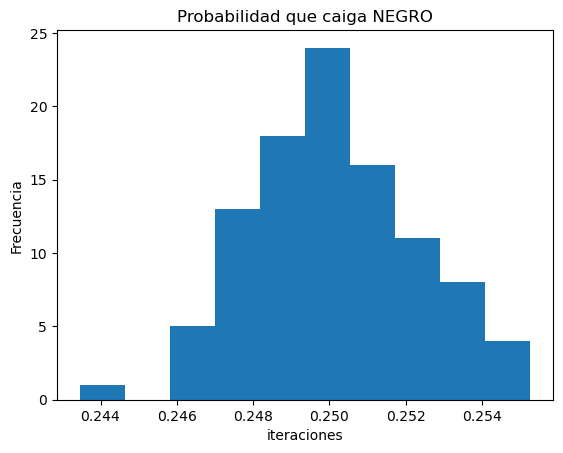

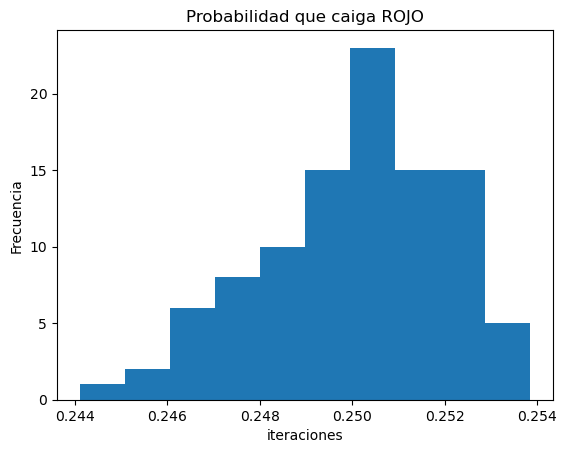

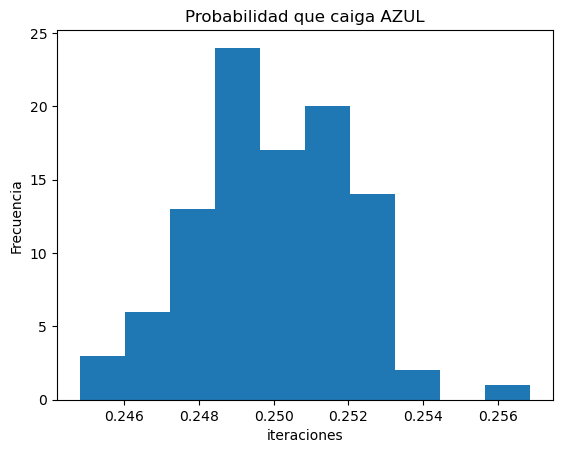

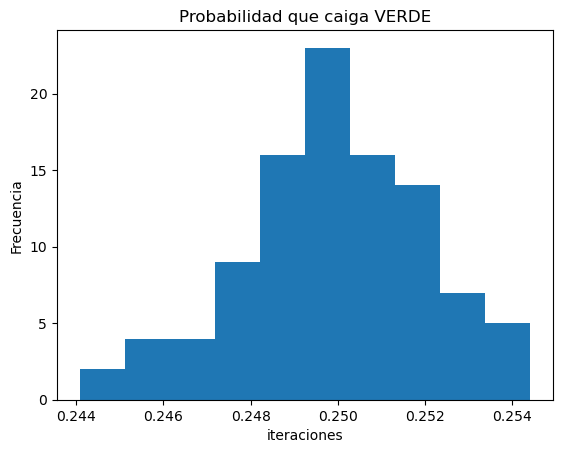

In [6]:
sector = ['NEGRO','ROJO','AZUL','VERDE']
for j in range(len(simulacion)):
    plt.hist(simulacion[j]) #Grafica las frecuencias de la aproximación al valor de la integral de las N simualciones con 750 experiementos cada una.
    plt.xlabel('iteraciones')
    plt.ylabel('Frecuencia')
    plt.title('Probabilidad que caiga '+ str(sector[j]))
    plt.show()

**PASO 9**. Calcule la media del área bajo la curva de la función y su desviación estándar.

In [23]:
Medias = [0,0,0,0]
Var = [0,0,0,0]
Des = [0,0,0,0]

sector = ['NEGRO','ROJO','AZUL','VERDE']
for j in range(len(sector)):
    Medias[j] =  np.mean(simulacion[j])
    Var[j] =  np.var(simulacion[j])
    Des[j] =  np.std(simulacion[j])

**PASO 10**. Halle el intervalo de confianza del valor de la integral con un nivel de confianza del $95 \%$.
\begin{equation*}
\overline{x}- Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}} < \mu < \overline{x}+ Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}}
\end{equation*}

In [29]:
from scipy.stats import norm #Importamos la libreria para poder obtener el valor de Z.
alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para \alpha/2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
sector = ['NEGRO','ROJO','AZUL','VERDE']
inf = [0,0,0,0]
sup = [0,0,0,0]
for j in range(len(sector)):
    inf[j] = Medias[j] - z_alpha_2 * (Des[j] / math.sqrt(N)) #Sacamos limite inferior por la formula
    sup[j] = Medias[j] + z_alpha_2 * (Des[j] / math.sqrt(N)) #Sacamos limite superior por la formula
    print("Entonces: ", inf[j], "< \u03BC ", sector[j],"<", sup[j])

Entonces:  0.24965489601218577 < μ  NEGRO < 0.25051910398781435
Entonces:  0.24961767738793034 < μ  ROJO < 0.25040932261206966
Entonces:  0.24958217012483508 < μ  AZUL < 0.2504018298751649
Entonces:  0.24949641624323948 < μ  VERDE < 0.25031858375676047
